In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [59]:
df = pd.read_csv('injury_monthly.csv')

bike_injuries = df.loc[df['BikeInjuries']>0]

bike_injuries.head(5)

,OBJECTID,Join_Count,TARGET_FID,Injuries,PedInjuries,BikeInjuries,MVOInjuries,MN,YR,All_12_3,...,MV_18_21,MV_21_24,NODEID,MASTER_NODEID,nodeX,nodeY,masterX,masterY,STREET1,STREET2
8,9,1,9,1,0,1,0,9,2017,0,...,0,0,20940,166,9.888612e+05,209393.5019,9.888612e+05,209393.5019,LEXINGTON AVENUE,EAST 26 STREET
12,13,1,13,1,0,1,0,9,2017,0,...,0,0,27533,238,1.002324e+06,199184.0672,1.002324e+06,199184.0672,GRAND STREET,MORGAN AVENUE
13,14,1,14,2,0,2,0,9,2017,0,...,0,0,46705,269,1.016361e+06,213938.6401,1.016361e+06,213938.6401,83 STREET,34 AVENUE
29,30,1,30,1,0,1,0,9,2017,0,...,0,0,14273,659,9.891592e+05,174969.9726,9.891592e+05,174969.9726,MICIELI PLACE,FT HAMILTON PARKWAY
34,35,1,35,1,0,1,0,9,2017,0,...,0,0,23985,789,9.950259e+05,231396.8922,9.950259e+05,231396.8922,COLUMBUS AVENUE,MORNINGSIDE DRIVE


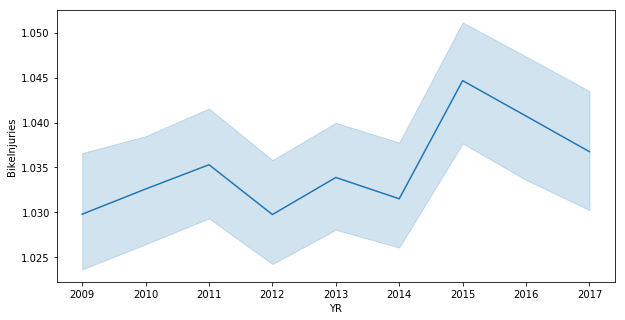

In [99]:
bi_fullyear = bike_injuries.loc[df['YR']<2018]

plt.figure(figsize=[10,5])
ax = sns.lineplot(x="YR", y="BikeInjuries", data=bi_fullyear)
plt.show()

In [97]:
bike_injuries_rec = bike_injuries.loc[df['YR']>2015]

In [98]:
bike_injuries_rec.groupby(['STREET1', 'STREET2', 'YR'])['BikeInjuries'].agg('sum').sort_values(ascending=False).head(10)

STREET1                           STREET2                           YR  
1 AVENUE                          EAST 14 STREET                    2017    9
EAST 14 STREET                    3 AVENUE                          2017    8
WILLIS AVENUE                     EAST 135 STREET                   2016    7
MORRIS AVENUE                     EAST 149 STREET                   2017    7
DELANCEY STREET                   CHRYSTIE STREET                   2017    7
LENOX AVENUE                      WEST 145 STREET                   2016    6
CHAMBERS STREET                   WEST STREET                       2016    6
OCEAN AVENUE                      BEVERLY ROAD                      2016    6
WEST 42 STREET                    AVENUE OF THE AMERICAS            2017    6
GRAND STREET                      UNION AVENUE                      2016    6
Name: BikeInjuries, dtype: int64

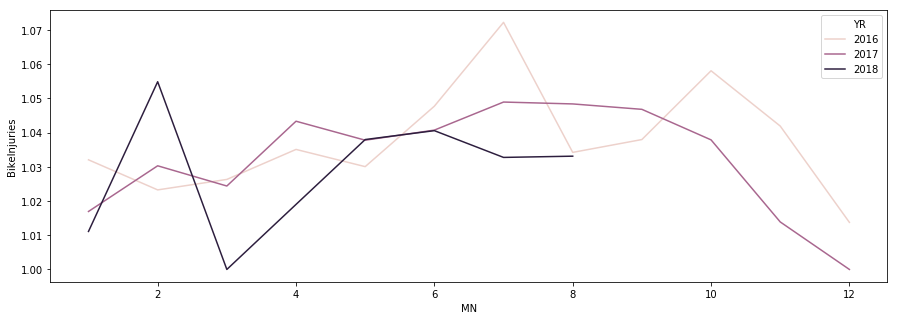

In [75]:
plt.figure(figsize=[15,5])
ax = sns.lineplot(x="MN", y="BikeInjuries", hue='YR', data=bike_injuries_rec, ci=None)
plt.show()

### Introduction

Bike injuries have increased over the past 10 years in New York City. While this is likely both a factor of an increasing population and an increasing population of bikers, it is also clear that some streets in the city are more dangerous than others. 

Based upon numerous <a href='https://peopleforbikes.org/blog/the-first-major-academic-study-of-protected-bike-lanes-in-the-u-s-is-out/'>studies</a>, protected bike lanes greatly increase the overall safety of a road for cyclists. In the list above, many of the highest-accident streets do not currently have a bike lane. 


### Hypothesis

Installing a bike lane on a busy street will lower the amount of bike accidents on the street. 

Bike accidents are an issue but as seen above, even on the most dangerous streets, they can only happen at a rate of 8 per year at the highest rate in an intersection. So we will also want to see the impact the bike lane has on ridership, as well as on the surroundings. The surroundings being the average speed of car traffic and the amount of car accidents on the street.

<em>Key outcome we will measure:</em> Amount of bicycle accidents at an intersection
<em>Secondary outcomes:</em> Amount of bicycle riders, average car speed traffic, and amount of car accidents on the street.


### Method

Based upon the measurements above, we will select a road which currently does not have a protected bike lane, along with one that does. We will install sensors on four different streets/intersections: 2 roads with a medium/low amount of car traffic and 2 with a medium/high level of car traffic. These sensors will track the amount of riders going by, as well as the average speed of car traffic (and amount of cars if possible) going by. Measuring the average speed of cars is important to be able to understand the effect of a bike lane on traffic.

We will use the sensors to measure the roads without bike lanes for 2 months.

On one of the medium/low roads, we will install a bike lane and on one of the medium/high traffic roads we will also install a bike lane. Over the course of the next two months, we will measure the amount of accidents and secondary outcomes. At the one month mark, we will take a look at impact then again at the two month mark.

Success will be measured by a lower rate of bicycle accidents. As a secondary measure if bicycle ridership increases without an increase in traffic on the street, the experiment could also be considered a success.